c:\Users\devri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\devri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\devri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\devri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

ValueError: Found input variables with inconsistent numbers of samples: [14000, 56000]

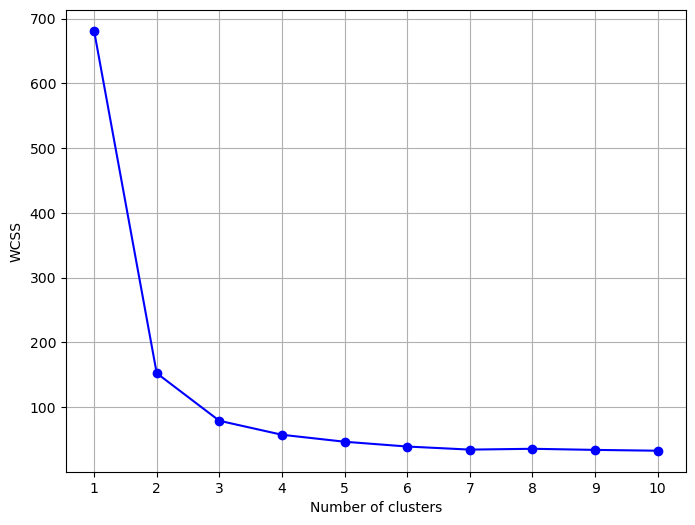

In [ ]:
from sklearn.datasets import fetch_openml, load_iris


iris = load_iris()

wcss = []

from sklearn.cluster import KMeans

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=11)
    kmeans.fit(iris.data)
    wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(range(1,11), wcss, marker='o', color='blue')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
 
from sklearn.decomposition import PCA

mnist = fetch_openml('mnist_784', version=1, return_X_y=True)

from sklearn.model_selection import train_test_split

X, y = mnist

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

from sklearn.preprocessing import StandardScaler
import time

scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

start_time = time.time()
logistic = LogisticRegression(solver='lbfgs', max_iter=100, random_state=11)
logistic.fit(X_test_scale, y_train)
time_no_pca = time.time() - start_time

from sklearn.metrics import accuracy_score

y_predict_no_pca = logistic.predict(X_test_scale)
accuracy_no_pca = accuracy_score(y_test)

pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train_scale)
X_test_pca = pca.transform(X_test_scale)

start_time = time.time()
logistic.fit(X_train_pca, y_train)
time_pca = time.time() - start_time

y_predict_pca = logistic.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_predict_pca)

print(f"Training time without PCA: {time_no_pca:.2f} seconds")
print(f"Accuracy without PCA: {accuracy_no_pca:.4f}")
print(f"Training time with PCA (95% variance): {time_pca:.2f} seconds")
print(f"Accuracy with PCA (95% variance): {accuracy_pca:.4f}")